# SPICED ACADEMY  //  WEEK 02  //  TITANIC SURVIVAL PREDICTION


---

# 0. Set Up

In [1]:
''' Essentials '''
import pandas as pd
import numpy as np

''' Plotting '''  
import matplotlib.pyplot as plt

''' Train-test split '''
from sklearn.model_selection import train_test_split

''' Modelling '''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

''' Model performance '''
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
import statsmodels.discrete.discrete_model as sm
from sklearn.utils.class_weight import compute_class_weight


---

# 1. Define Business Goal

Predict survival outcome for titanic


---

# 2. Get Data

In [2]:
df = pd.read_csv('data/train.csv') # train.csv is a name assigned by Kaggle, and is the full dataset in this case


---

# 3. Train-Test Split

In [3]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


---

# 4. Explore Data

In [5]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.00,NaN,S
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S
81,82,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S
319,320,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.00,NaN,S


In [6]:
y_train.head()

733    0
857    1
81     1
319    1
720    1
Name: Survived, dtype: int64

In [7]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            135
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          555
Embarked         2
dtype: int64

# 5. Feature Engineering

In [8]:
def process(df):
    
    df.drop(['Cabin', 'Ticket', 'Fare', 'Name', 'PassengerId'], inplace=True, axis=1)
    
    df.fillna({'Age':df['Age'].mean(), 'Embarked':'S'}, inplace=True)
    
    df.loc[:,'Age'] = (df.loc[:,'Age'] - df.loc[:,'Age'].mean()) / df.loc[:,'Age'].std()

    df.loc[:,'Sex'].replace({'male':0, 'female':1}, inplace=True)
    
    df.loc[:,'Embarked'].replace({'C':1, 'Q':0, 'S':0}, inplace=True)

    return df

In [9]:
X_train_fe = process(X_train)

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

# 6. Train Model

## 6.a. Model 1 - Simple Logistic Regression

In [10]:
m = LogisticRegression()

In [11]:
m.fit(X_train_fe, y_train)

LogisticRegression()

In [12]:
m.coef_, m.intercept_

(array([[-1.08815535,  2.54590915, -0.47454174, -0.28869486, -0.05789759,
          0.39247826]]),
 array([1.00738853]))

## 6.b. Model 2 - Logistic Regression + Imbalance Correction

In [13]:
m2 = LogisticRegression(class_weight='balanced')

In [14]:
m2.fit(X_train_fe, y_train)

LogisticRegression(class_weight='balanced')

In [15]:
m2.coef_, m2.intercept_

(array([[-1.04956502,  2.49018914, -0.4918378 , -0.29051686, -0.04958379,
          0.4267783 ]]),
 array([1.4662101]))

In [16]:
[(a, b) for (a, b) in zip(m.coef_[0], X_train.columns)]

[(-1.0881553499484948, 'Pclass'),
 (2.5459091532817015, 'Sex'),
 (-0.4745417406571986, 'Age'),
 (-0.28869485571890496, 'SibSp'),
 (-0.057897589890610376, 'Parch'),
 (0.3924782574818066, 'Embarked')]

# 7. Calculate Test Score

In [17]:
X_test_fe = process(X_test)

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [18]:
"""
Creates a table of probability of 1 (survived), 0 (drowned) on X_test dataset and true outcome
"""

estimates_y_test = m.predict_proba(X_test)

estimates_y_test = pd.DataFrame(data=estimates_y_test, columns=['0','1'])

true_y_test = y_test.reset_index().drop('index', axis=1)

estimates_y_test.join(true_y_test)

,0,1,Survived
0,0.657792,0.342208,0
1,0.047625,0.952375,1
2,0.494782,0.505218,0
3,0.810338,0.189662,1
4,0.762950,0.237050,0
...,...,...,...
174,0.905259,0.094741,0
175,0.905259,0.094741,0
176,0.136409,0.863591,1
177,0.948857,0.051143,0


In [19]:
m.score(X_train_fe, y_train), m2.score(X_train_fe, y_train)

(0.8047752808988764, 0.7837078651685393)

In [20]:
print(m.score(X_test_fe, y_test), m2.score(X_test_fe, y_test))

0.8156424581005587 0.8212290502793296


In [21]:
y_pred = m.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.84      0.72      0.78        80

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



Based on the ROC curve, the ideal threshold would yield Sensitivity rate of 0.8 and False Positive Rate of <0.2.

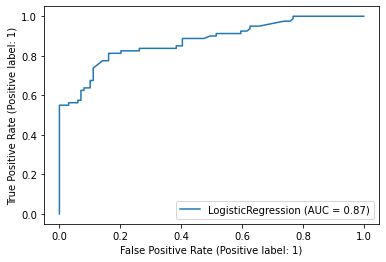

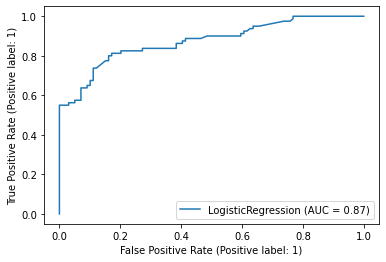

In [23]:
plot_roc_curve(estimator=m, X=X_test_fe, y=y_test)
plot_roc_curve(estimator=m2, X=X_test_fe, y=y_test)